In [8]:
#Importing commonly used modules

import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from keras.utils import np_utils
from keras import regularizers
import pandas as pd

Using TensorFlow backend.


In [9]:
#Loading Cifar-10 data

from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [43]:
#Creating neural network model

size = 32
classes_num = 10

decay = 1e-4
model = Sequential([
    Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(decay), activation='relu', input_shape=(size,size,3)),
    BatchNormalization(),
    Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(decay), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(decay), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(decay), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(decay), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    
    Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(decay), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
 
    Flatten(),
    Dense(classes_num, activation='softmax'),
])

In [44]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_11 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_12 (Batc (None, 16, 16, 32)       

In [3]:
#Loading data to be predicted

test_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cifar_image_flattened_pixels.csv")

In [5]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,98,105,108,92,101,106,91,101,107,93,...,171,183,182,176,175,175,168,181,181,175
1,101,108,101,101,108,101,102,109,102,103,...,103,100,109,104,100,109,103,100,109,102
2,85,115,27,63,90,25,37,66,15,69,...,141,172,193,136,173,192,138,179,192,149
3,213,213,214,215,214,218,220,218,226,223,...,216,193,194,209,201,204,216,203,201,237
4,41,74,144,41,75,139,41,75,139,41,...,133,41,77,130,44,75,133,42,73,144


In [10]:
#Pre-processing data to feed neural net

x_train = x_train.astype('float32')
x_train /= 255
y_train = np_utils.to_categorical(y_train)
x_test = x_test.astype('float32')
x_test /= 255
y_test = np_utils.to_categorical(y_test)

test_data = test_data.astype('float32')
test_data /= 255
test = test_data.to_numpy()
tester = np.reshape(test, (2000,32,32,3))

In [11]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,0.384314,0.411765,0.423529,0.360784,0.396078,0.415686,0.356863,0.396078,0.419608,0.364706,...,0.670588,0.717647,0.713726,0.690196,0.686275,0.686275,0.658824,0.709804,0.709804,0.686275
1,0.396078,0.423529,0.396078,0.396078,0.423529,0.396078,0.400000,0.427451,0.400000,0.403922,...,0.403922,0.392157,0.427451,0.407843,0.392157,0.427451,0.403922,0.392157,0.427451,0.400000
2,0.333333,0.450980,0.105882,0.247059,0.352941,0.098039,0.145098,0.258824,0.058824,0.270588,...,0.552941,0.674510,0.756863,0.533333,0.678431,0.752941,0.541176,0.701961,0.752941,0.584314
3,0.835294,0.835294,0.839216,0.843137,0.839216,0.854902,0.862745,0.854902,0.886275,0.874510,...,0.847059,0.756863,0.760784,0.819608,0.788235,0.800000,0.847059,0.796078,0.788235,0.929412
4,0.160784,0.290196,0.564706,0.160784,0.294118,0.545098,0.160784,0.294118,0.545098,0.160784,...,0.521569,0.160784,0.301961,0.509804,0.172549,0.294118,0.521569,0.164706,0.286275,0.564706


In [46]:
#Fitting model to cifar-10 test data

history = model.fit(
    x_test,y_test,
    validation_data=(x_train,y_train,),
    epochs=100,batch_size=64
)

Epoch 1/100
157/157 [==============================] - 6s 41ms/step - loss: 1.7060 - accuracy: 0.4132 - val_loss: 2.7376 - val_accuracy: 0.1259
Epoch 2/100
157/157 [==============================] - 6s 37ms/step - loss: 1.2913 - accuracy: 0.5523 - val_loss: 2.5860 - val_accuracy: 0.1881
Epoch 3/100
157/157 [==============================] - 6s 37ms/step - loss: 1.0707 - accuracy: 0.6299 - val_loss: 1.6648 - val_accuracy: 0.4179
Epoch 4/100
157/157 [==============================] - 6s 37ms/step - loss: 0.9062 - accuracy: 0.6900 - val_loss: 1.2826 - val_accuracy: 0.5698
Epoch 5/100
157/157 [==============================] - 6s 37ms/step - loss: 0.7515 - accuracy: 0.7465 - val_loss: 1.4843 - val_accuracy: 0.5395
Epoch 6/100
157/157 [==============================] - 6s 37ms/step - loss: 0.6160 - accuracy: 0.7979 - val_loss: 1.3288 - val_accuracy: 0.6049
Epoch 7/100
157/157 [==============================] - 6s 37ms/step - loss: 0.4990 - accuracy: 0.8374 - val_loss: 1.6080 - val_accuracy:

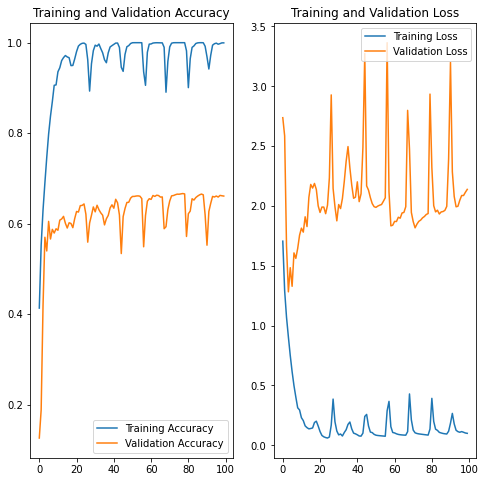

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [48]:
model.predict_classes(tester)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([2, 3, 7, ..., 2, 5, 4])

In [49]:
np.argmax(model.predict(tester), axis=-1)

array([2, 3, 7, ..., 2, 5, 4])

In [50]:
res = pd.DataFrame(np.argmax(model.predict(tester), axis=-1))
res.to_csv("pred.csv")
res.head()

,0
0,2
1,3
2,7
3,8
4,6
